In [1]:
# for hide warning messages
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# import
from Pthougt_encode import Pthought_vec
from STS_function import *
import tensorflow as tf
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import csv
import matplotlib.pyplot as plt

## Load encoder (two-layer Forward RNN encoder) 

In [3]:
glove_path = "D:/glove.840B.300d.txt"
word_emb_dim = 300

sess = tf.Session()
model = Pthought_vec(1200,2,300,bi_direction=False)
model.set_glove_path(glove_path)
model.enc_saver()
model.load_enc(model_path= './model/two_forward',model_name="Pthought_net.ckpt",sess=sess)

placeholders created !
encoder created !
INFO:tensorflow:Restoring parameters from ./model/two_forward/Pthought_net.ckpt


## Generate sentence vectors 

In [4]:
# training data
train = pd.read_csv("./data/STS/sts-train.csv",sep="\t",error_bad_lines=False,
                    warn_bad_lines=False,header=None,quoting=csv.QUOTE_NONE)

tr_A = np.array(train[5])
tr_B = np.array(train[6])
tr_Y = np.array(train[4],dtype=float)

model.build_vocab(tr_A,tokenize = True)
tr_A = model.encode(sess, tr_A, tokenize = True)

model.build_vocab(tr_B,tokenize = True)
tr_B = model.encode(sess,tr_B, tokenize=True)

abs_tr = np.abs(tr_A - tr_B)
dot_tr = np.multiply(tr_A,tr_B)
tr_X = np.c_[abs_tr,dot_tr]

Found 10530(/10906) words with glove vectors
Vocab size : 10530
Found 10564(/10969) words with glove vectors
Vocab size : 10564


In [5]:
# test data
test = pd.read_csv("./data/STS/sts-test.csv",sep="\t",error_bad_lines=False,
                   warn_bad_lines=False,header=None,quoting=csv.QUOTE_NONE)
tst_A = np.array(test[5])
tst_B = np.array(test[6])
tst_Y = np.array(test[4],dtype=float)

model.set_glove_path(glove_path)
model.build_vocab(tst_A,tokenize = True)
tst_A = model.encode(sess, tst_A, tokenize = True)

model.build_vocab(tst_B,tokenize = True)
tst_B = model.encode(sess,tst_B, tokenize=True)
abs_tst = np.abs(tst_A - tst_B)
dot_tst = np.multiply(tst_A,tst_B)
tst_X = np.c_[abs_tst,dot_tst]

Found 3655(/3717) words with glove vectors
Vocab size : 3655
Found 3559(/3616) words with glove vectors
Vocab size : 3559


In [6]:
# development data
dev = pd.read_csv("C:/Users/MJ/Desktop/stsbenchmark/sts-dev.csv",sep="\t",error_bad_lines=False,
                  warn_bad_lines=False,header=None,quoting=csv.QUOTE_NONE)
dev_A = np.array(dev[5])
dev_B = np.array(dev[6])
dev_Y = np.array(dev[4],dtype=float)

model.build_vocab(dev_A,tokenize = True)
dev_A = model.encode(sess, dev_A, tokenize = True)

model.build_vocab(dev_B,tokenize = True)
dev_B = model.encode(sess,dev_B, tokenize=True)

abs_dev = np.abs(dev_A - dev_B)
dot_dev = np.multiply(dev_A,dev_B)
dev_X = np.c_[abs_dev,dot_dev]

Found 5029(/5117) words with glove vectors
Vocab size : 5029
Found 4996(/5095) words with glove vectors
Vocab size : 4996


## Train Linear model

In [7]:
yhat_tst = Logistic_Reg(tr_X,tr_Y,dev_X,dev_Y,tst_X,tst_Y)
print("Pearson cor:",pearsonr(yhat_tst,tst_Y)[0], "Spearman cor:",spearmanr(yhat_tst,tst_Y)[0])

Pearson cor: 0.796288842004 Spearman cor: 0.765617743414


## Visualize scatter plot

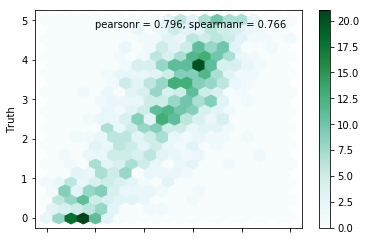

In [8]:
# Scatter plot
df = pd.DataFrame( np.c_[yhat_tst,tst_Y], columns=['Pred',"Truth"])
ax = df.plot.hexbin(x='Pred',y="Truth",gridsize=20)
ax.text(1, 4.8, r'pearsonr = %.3f, spearmanr = %.3f' % (pearsonr(yhat_tst,tst_Y)[0],spearmanr(yhat_tst,tst_Y)[0]))
ax.set_facecolor('white')
plt.show()